#  Загрузка и подготовка данных


In [2]:
#Загрузка необходимых библиотек
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


In [3]:

# Загрузка данных, удаление лишних данных по всем 3 выборкам
column=['0takt','1takt','2takt','3takt','4takt','5takt','6takt','7takt','8takt',
                          '9takt','10takt','11takt','12takt','13takt','14takt','15takt','16takt','17takt']
try:
    df1=pd.read_csv('SOP1.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)

    df2=pd.read_csv('SOP2.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    df3=pd.read_csv('SOP3.dat',delimiter=' ',encoding='windows-1250',header=None,error_bad_lines=False)
    print('Данные загруженны ')
except:
    print('Данные не загрузились ')

try:  
    df1=df1.drop([0,0]) # удаление технической строки
    df1=df1.drop(columns=[17,0]) # удаление лишних столбцов,   расстояние мм будет индекс
    df2=df2.drop([0,0]) # удаление технической строки
    df2=df2.drop(columns=[17,0])  # удаление лишних столбцов,   расстояние мм будет индекс 
    df3=df3.drop([0,0]) # удаление технической строки
    df3=df3.drop(columns=[17,0])# удаление лишних столбцов,   расстояние мм будет индекс
    df1=df1.astype("float32")# приводим данные к float
    df2=df2.astype("float32")# приводим данные к float
    df3=df3.astype("float32")# приводим данные к float
    print('Данные  обработаны ')
except:
    print('Данные не обработались ')


    

Данные загруженны 
Данные  обработаны 


C:\Users\tai-sku\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df3.describe()

In [ ]:
df1=pd.read_csv('SOP1.dat',delimiter=' ',skiprows=[0],encoding='windows-1250',header=None,index_col=[0])

In [ ]:
df1.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

In [ ]:
df1.columns

## анализ данных

In [ ]:
# смотрим данные на примере 1 выборки
df1.info()

In [ ]:
# анализ структуры 1 выборки
df1.describe()

In [ ]:
# анализ структуры 2 выборки
df2.describe()

In [ ]:
# анализ структуры 3 выборки
df3.describe()

## Построение графиков

<IPython.core.display.Javascript object>


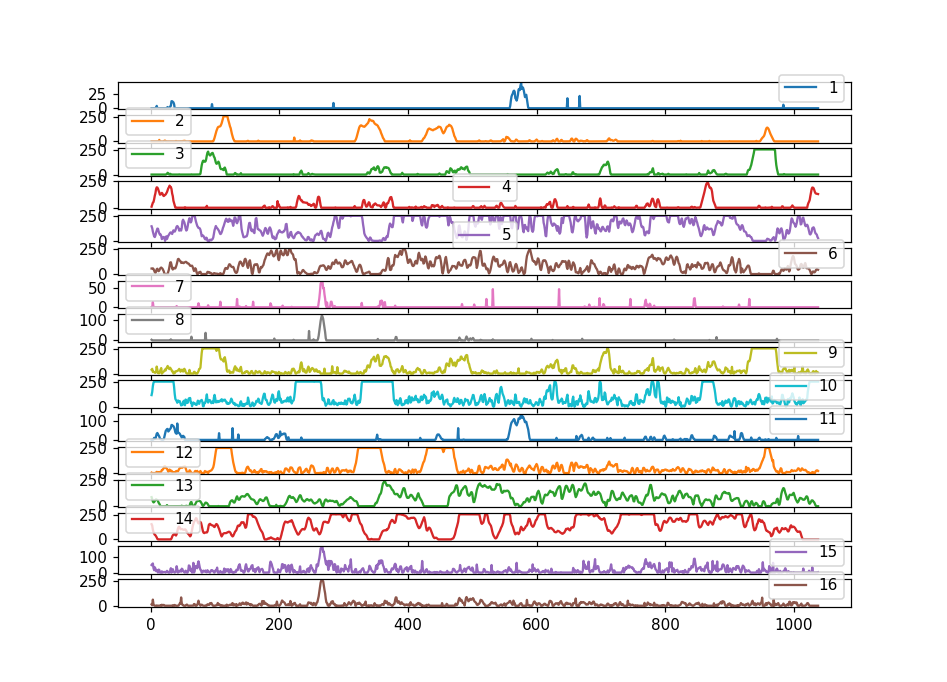

numpy.ndarray

In [14]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df3.plot.line(subplots=True)
type(axes)

In [ ]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df3.rolling(20).mean().plot.line(subplots=True,figsize=(20,10))
type(axes)

In [ ]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df2.rolling(20).sum().plot.line(subplots=True,figsize=(20,10))
type(axes)

<IPython.core.display.Javascript object>


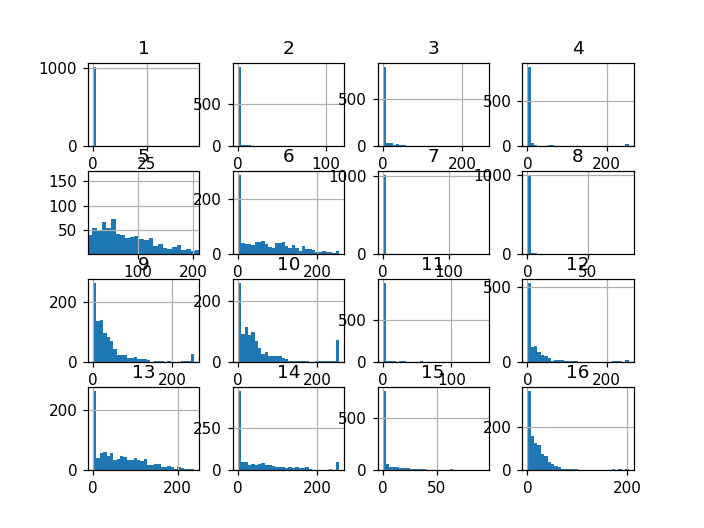

numpy.ndarray

In [4]:
# построение гистограмм распределения
type(df2.hist(bins=30))

In [ ]:
# Построим ящик с усами для определения плотности в данных. Подставляем датафрейм соответствующий
%matplotlib 
df1.boxplot()

In [ ]:
def gr(start,finish):
    # Построим график значений в координатах  для каждого признака. Подставляем датафрейм соответствующий
    axes = df1.loc[start:finish,:].plot.line(subplots=True,figsize=(20,10))
    type(axes)

In [ ]:
gr(0,300)

In [ ]:
# Построим график значений в координатах  для каждого признака с усреднением. Подставляем датафрейм соответствующий
axes = df1.rolling(20).mean().plot.line(subplots=True,figsize=(20,10))
type(axes)

Признаки эхо-метода. Эхо-метод: 1,2,3,4,7,8
Эхо-контактные :9,10,11,12,15,16 
Признаки теневого метода: 5,6,13,14
Поперечные дефекты 7,8 эхо контактные 15,16


# Modul 2


# Построение корреляционных данных и их визуализация

In [ ]:
# анализ корреляции
corr1 = df1[list(df1.columns)].corr()
#corr1=df1.corr(method='pearson', min_periods=1)
corr2=df2.corr(method='pearson', min_periods=1)
corr3=df3.corr(method='pearson', min_periods=1)

In [ ]:
c=round(corr1,1)
sns.heatmap(c)

In [ ]:
sns.clustermap(corr1)

In [ ]:
sns.heatmap(corr1,annot=True)

In [ ]:
corr3=df3.rolling(25).sum().corr(method='pearson', min_periods=1)
sns.heatmap(round(corr3,0),annot=True)

In [ ]:
corr3=df2.rolling(30).mean().corr(method='pearson', min_periods=1)
sns.heatmap(round(corr3,0),annot=True)

In [ ]:
rolling = df1.rolling (window = 25)
rolling_mean = rolling.mean()
rolling_mean

In [ ]:
# сглаживание скользящим средним
rolling = df2.rolling (window = 25)
rolling_mean = rolling.mean()

# корреляции
corr = rolling_mean.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize = (15, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', ax = ax)

In [38]:
# поиск корреляции по столбцам
for n in range(1,17):
    df5=df3.rolling(30,min_periods=1).mean()
    dic={}
    for i in range(0,1200):
        #функция для визуализации определения смещения
        df5[n]=np.roll(df5[n],-1)
        corrr=df5.corr()
        dic[i]=(float(corrr.at[n,4]))
    ssd = sorted(dic, key=dic.__getitem__)
    k = ssd[-1]
    {k: dic[k]}
    print(n,{k: dic[k]})


1 {557: 0.7209394448554748}
2 {1134: 0.6619556631475305}
3 {1122: 0.7463820958469236}
4 {1199: 1.0}
5 {561: 0.33936777949261876}
6 {379: 0.510195872386465}
7 {253: 0.6761447053938341}
8 {252: 0.7457689132375864}
9 {1123: 0.7517418473092152}
10 {1036: 0.7887789559657329}
11 {555: 0.6123235748155155}
12 {1132: 0.6220718242572758}
13 {650: 0.4763902049910899}
14 {665: 0.34206943959064856}
15 {251: 0.5347045771232003}
16 {252: 0.6358621654831631}


In [39]:
132-36

96

In [ ]:
df1[2]=np.roll(df1[2],10)


In [ ]:
def corel(sdvig,takt,ser2):
    df5=df2
    df5[takt]=np.roll(df5[takt],sdvig)
    
    sns.heatmap(df5.corr())

In [29]:
dfA=df3.copy()

In [30]:
dfA=dfA.rolling(20).mean()
dfA.fillna(0)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
2,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
3,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
4,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
5,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,0.0,0.0,0.0,83.25,131.65,46.75,0.0,0.0,11.95,176.60,0.0,12.05,53.90,0.0,3.60,4.55
1035,0.0,0.0,0.0,89.95,123.40,45.80,0.0,0.0,12.25,187.60,0.0,11.60,50.85,0.0,2.30,4.55
1036,0.0,0.0,0.0,96.60,116.10,44.30,0.0,0.0,12.60,198.35,0.0,11.40,47.75,0.0,2.35,4.55
1037,0.0,0.0,0.0,103.20,108.95,41.75,0.0,0.0,12.70,208.65,0.0,11.30,44.45,0.0,2.35,4.55


<IPython.core.display.Javascript object>


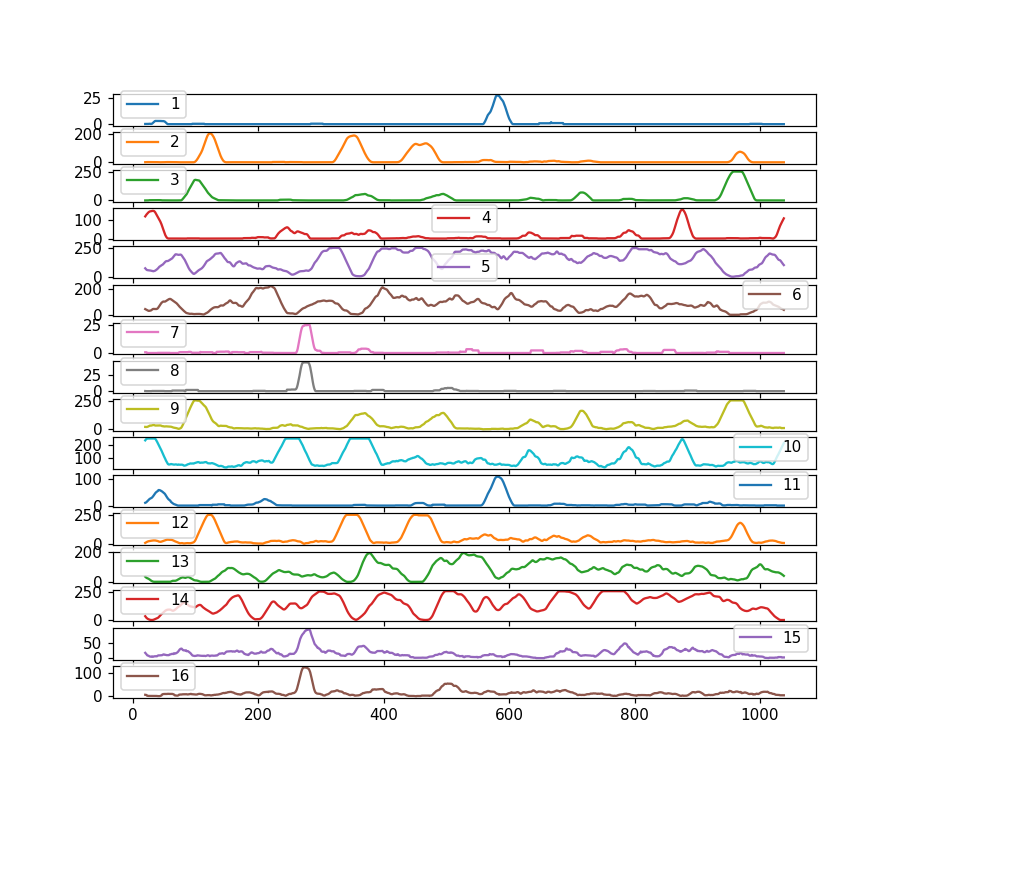

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [31]:

dfA.plot.line(subplots=True)

<IPython.core.display.Javascript object>


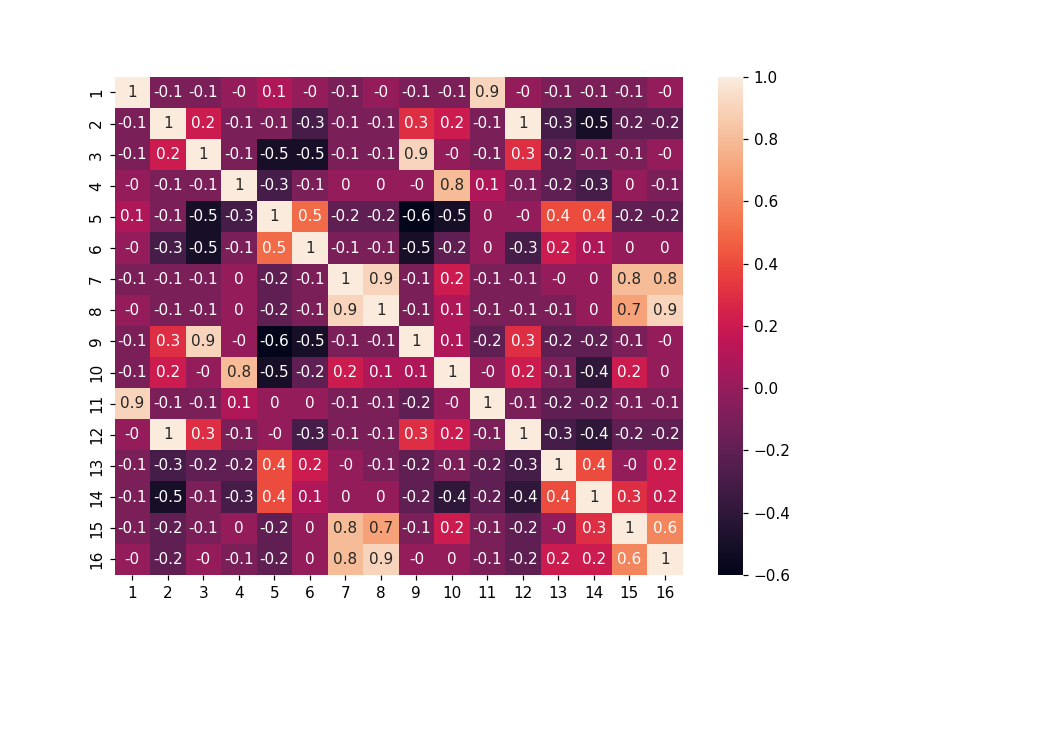

<AxesSubplot:>

In [21]:
sns.heatmap(round(dfA.corr(),1),annot=True)

поиск локальных максимумов

In [33]:
for i in range(1,17):
    print(i,dfA[i].tail(300).idxmax())

1 984
2 968
3 958
4 876
5 802
6 793
7 783
8 880
9 954
10 876
11 920
12 968
13 1000
14 751
15 784
16 951


In [37]:
round((98+96+92)/3,0)

95.0

In [ ]:
interact (corel,sdvig=widgets.IntSlider(min=1, max=1000, step=1, value=0),takt=widgets.IntSlider(min=1, max=17, step=1, value=1),ser2=widgets.IntSlider(min=1, max=17, step=1, value=1))

 Точного соответствия методом расчета, получить не удалось,  среднее арифметическое 95 от трех образцов 
 но с помощью гугла можно найти характеристики этого прибора и смещение составляет между схемами 95 мм. Первые датчики смещены на 50 мм, вторые соответственно на 145 мм.


# Поиск несплошностей

In [ ]:
import plotly.express as px



<IPython.core.display.Javascript object>


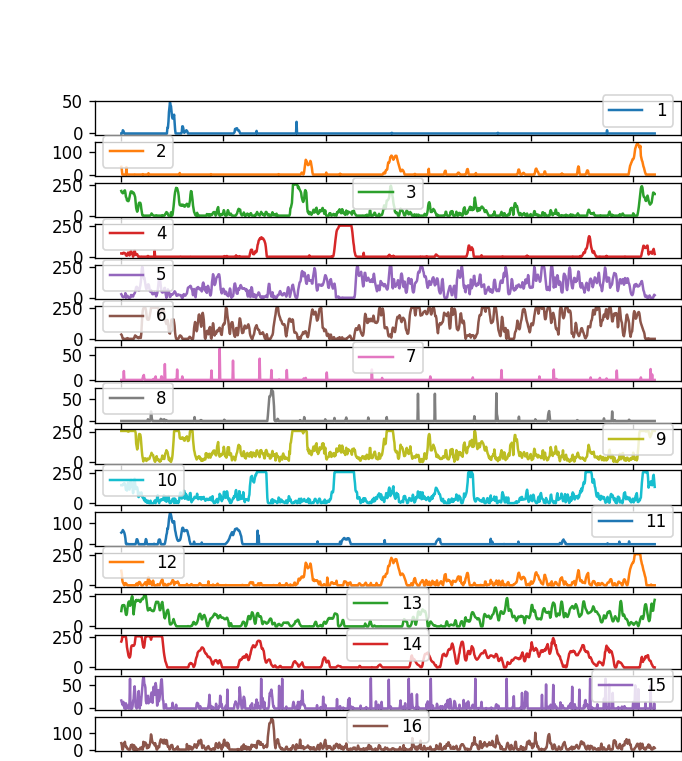

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [5]:
df1.plot.line(subplots=True)

In [59]:
df11=df2.copy()

In [60]:
df11

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0.0,0.0,175.0,12.0,0.0,0.0,0.0,0.0,255.0,112.0,0.0,0.0,233.0,173.0,2.0,23.0
2,0.0,0.0,159.0,10.0,10.0,0.0,0.0,0.0,255.0,108.0,0.0,0.0,222.0,173.0,10.0,34.0
3,0.0,0.0,139.0,25.0,48.0,0.0,0.0,0.0,255.0,145.0,0.0,0.0,230.0,175.0,18.0,18.0
4,0.0,0.0,130.0,54.0,61.0,0.0,0.0,0.0,255.0,216.0,0.0,1.0,237.0,185.0,52.0,22.0
5,0.0,0.0,110.0,54.0,57.0,0.0,0.0,0.0,236.0,207.0,3.0,4.0,239.0,205.0,43.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,28.0,166.0,4.0,0.0,21.0
1036,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,4.0,123.0,0.0,48.0,163.0,16.0,14.0,2.0
1037,0.0,0.0,0.0,17.0,2.0,0.0,0.0,0.0,9.0,122.0,0.0,34.0,125.0,31.0,0.0,11.0
1038,0.0,0.0,0.0,11.0,26.0,0.0,11.0,0.0,0.0,110.0,0.0,27.0,132.0,42.0,0.0,2.0


In [61]:
Приведение к общей координате
for n in range(1,17):
    df11[n]=np.roll(df11[n],-50)
    
for p in [3,4,5,6,9,10]:
    df11[n]=np.roll(df11[n],95)

In [62]:
df11

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,0.0,0.0,0.0,0.0,22.0,190.0,0.0,0.0,30.0,0.0,4.0,0.0,177.0,255.0,23.0,2.0
2,0.0,0.0,0.0,0.0,34.0,126.0,0.0,0.0,22.0,0.0,5.0,0.0,136.0,255.0,3.0,62.0
3,0.0,0.0,0.0,0.0,34.0,109.0,0.0,0.0,23.0,8.0,9.0,0.0,115.0,255.0,13.0,22.0
4,0.0,0.0,0.0,0.0,31.0,121.0,0.0,0.0,17.0,24.0,12.0,0.0,111.0,255.0,17.0,17.0
5,0.0,0.0,0.0,0.0,25.0,149.0,0.0,0.0,8.0,26.0,10.0,0.0,111.0,255.0,37.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,0.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,15.0,0.0,0.0,3.0,205.0,255.0,54.0,80.0
1036,8.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,15.0,1.0,0.0,18.0,215.0,255.0,42.0,22.0
1037,0.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,19.0,0.0,0.0,0.0,209.0,255.0,21.0,14.0
1038,0.0,0.0,0.0,0.0,0.0,255.0,0.0,0.0,15.0,10.0,0.0,0.0,203.0,255.0,36.0,6.0


<IPython.core.display.Javascript object>


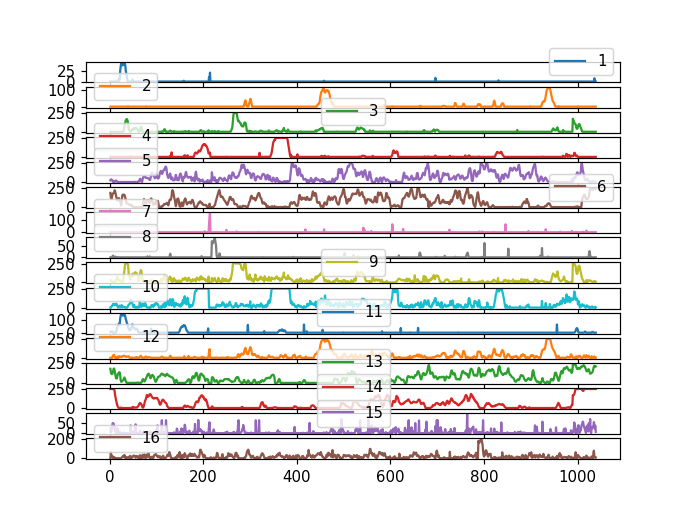

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [63]:
df11.plot.line(subplots=True)

In [64]:
df11A=df11[[1,11,13,3,9,5]]

<IPython.core.display.Javascript object>


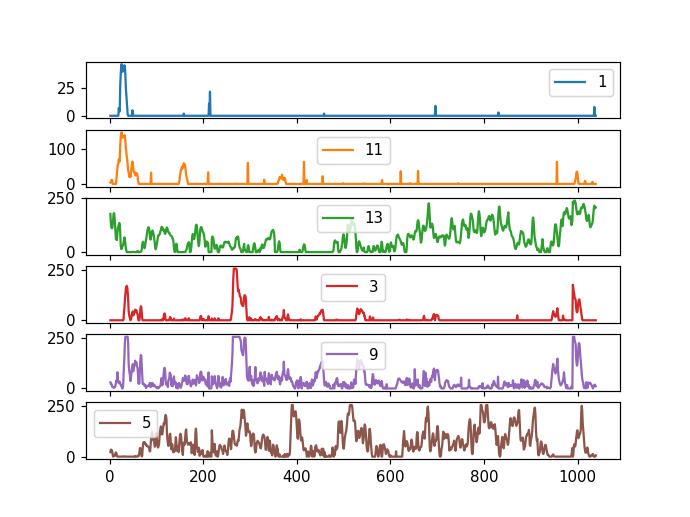

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [65]:
df11A.plot.line(subplots=True)


<IPython.core.display.Javascript object>


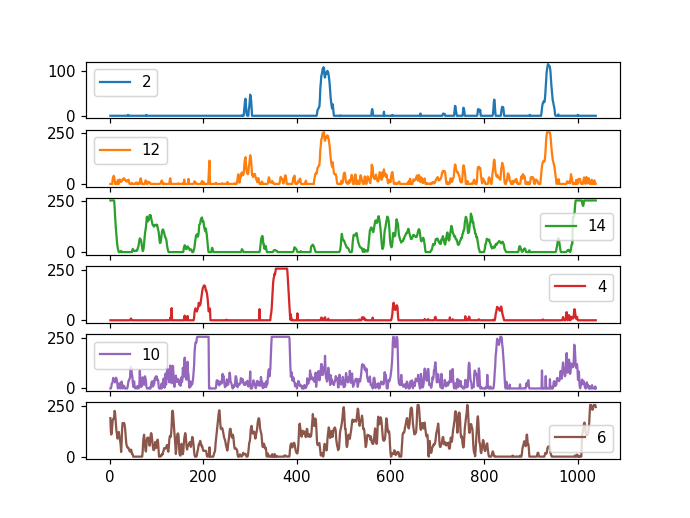

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [66]:
df11B=df11[[2,12,14,4,10,6]]
df11B.plot.line(subplots=True)

<IPython.core.display.Javascript object>


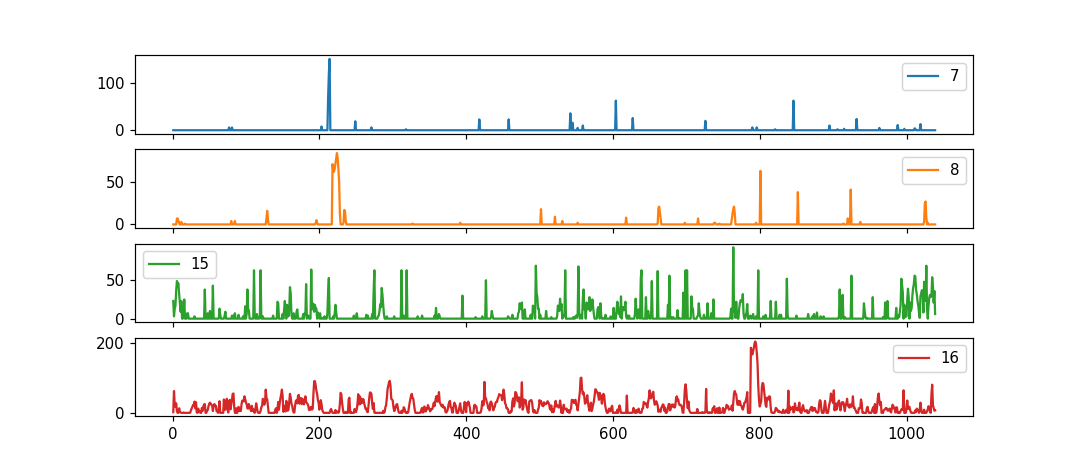

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [67]:
df11P=df11[[7,8,15,16]]
df11P.plot.line(subplots=True)

In [41]:
!voila --show_tracebacks=True

^C


In [56]:
 !voila Mod1.ipynb

^C


In [55]:
!dir


 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 9AA6-2548

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\tai-sku\Desktop\jupyter\Љ®­Єгаб­ п ¤®Єг¬Ґ­в жЁп\‘2-Њ3

06.04.2022  16:13    <DIR>          .
06.04.2022  16:13    <DIR>          ..
06.04.2022  15:14    <DIR>          .ipynb_checkpoints
05.04.2022  12:39           752я063 Mod1.ipynb
06.04.2022  16:12           970я225 Modul 3-1.ipynb
03.04.2022  13:04             3я450 Modul 3.ipynb
08.06.2019  01:35            72я996 SOP1 - Є®ЇЁп.dat
08.02.2022  21:28            72я982 SOP1.csv
08.06.2019  01:35            72я996 SOP1.dat
08.06.2019  01:35            72я996 SOP11.csv
08.06.2019  01:35            72я786 SOP2 - Є®ЇЁп.dat
08.06.2019  01:35            72я786 SOP2.csv
08.06.2019  01:35            72я786 SOP2.dat
08.06.2019  01:35            72я716 SOP3 - Є®ЇЁп.dat
08.06.2019  01:35            72я716 SOP3.csv
08.06.2019  01:35            72я716 SOP3.dat
08.06.2019  01:35               232 target1.csv
08.06.2019  01:35               205 target2.c